# TOOLS for Hologram characterisation

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : February 7th 2022


In [1]:
import ipywidgets as widgets
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

# Constants

## Hologram recording 

In [42]:
Z=200.0 # mm, distance between hologram and source plane

In [3]:
x_A=0 # mm, position of the source A
y_A=0 # mm, 

In [4]:
x_B=20 ## mm, position of the source B that will become the first order
y_B=0 ## mm

In [5]:
wl0=0.639e-3 ## recording wavelength in mm

In [6]:
XMIN=-40
XMAX=40
YMIN=-40
YMAX=40
NPIX=1000

In [59]:
(x_B-x_A)/Z/wl0

156.49452269170578

In [58]:
(x_B-x_A)/np.sqrt(Z**2 + ((x_B-x_A)/2)**2)/wl0

156.29927055991308

## Function

In [7]:
def dd(x,y,x0,y0):
    """
    d_A(x,y,x0,y0) : distance between the point(x,y) on the hologram to the source of coordinate (x0,y0,Z)
    """
    
    dist = np.sqrt((x-x0)**2+(y-y0)**2+Z**2)
    
    return dist

In [8]:
def dd_diff(x,y):
    """
    d_ddiff(x,y) : distance difference between the two sources
    """
    dd_diff=
    
    
    -dd(x,y,x_B,y_B)
    return dd_diff

In [9]:
def dd_phi(x,y):
    """
    dd_phase(x,y) : phase difference at point x,y on CCD
    """
    return 2*np.pi/wl0*dd_diff(x,y)

In [10]:
def interf_pattern(x,y):
    return 0.5*(np.cos(dd_phi(x,y))+1)

In [39]:
def deriv_interf_pattern(x,y):
    return 0.5*(np.sin(dd_phi(x,y)))

# plot slice

In [11]:
X=np.linspace(XMIN,XMAX,NPIX)

In [12]:
I0=interf_pattern(X,0)

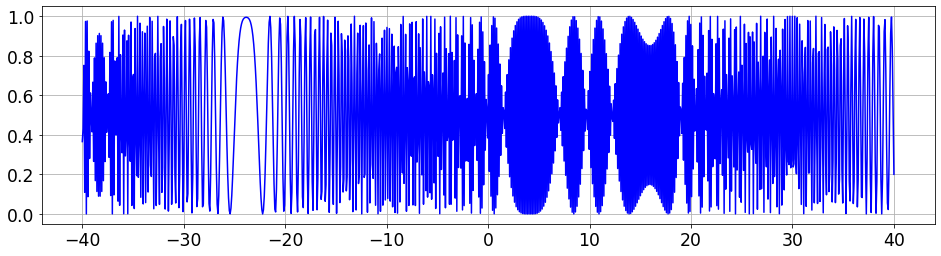

In [13]:
plt.plot(X,I0,'b-')
plt.grid()

# Mesh grid

In [14]:
X = np.linspace(XMIN, XMAX, NPIX)
Y = np.linspace(YMIN, YMAX, NPIX)
XX, YY = np.meshgrid(X, Y, sparse=True)

In [15]:
I1=dd_phi(XX,YY)
I2=interf_pattern(XX,YY)

# Contour level of constant phase difference

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_80134/3071450531.py:5: UserWarning: The following kwargs were not used by contour: 'lw'
  h1 = ax.contour(X,Y,ZZ,levels=50,colors="w",lw=1)


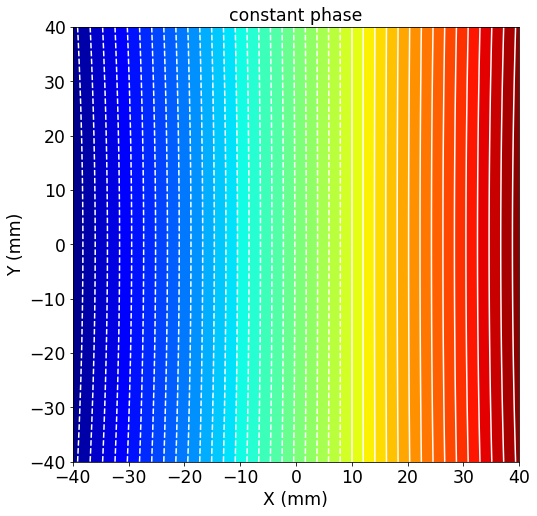

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ZZ = I1
h = ax.contourf(X,Y,ZZ,levels=50,cmap="jet")
h1 = ax.contour(X,Y,ZZ,levels=50,colors="w",lw=1)
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_title("constant phase")
plt.show()

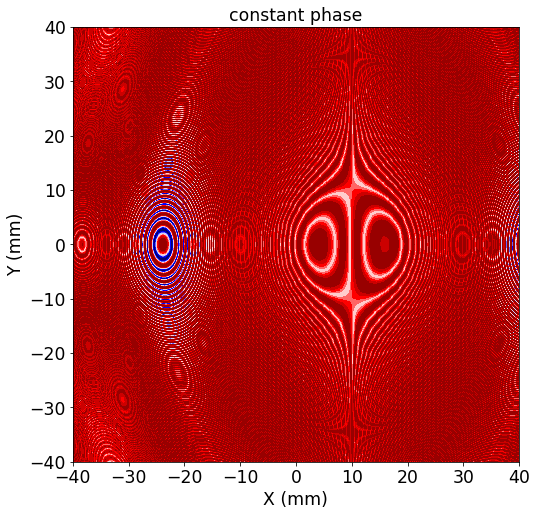

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ZZ = I2
h = ax.contourf(X,Y,ZZ,levels=10,cmap="seismic")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_title("constant phase")
plt.show()

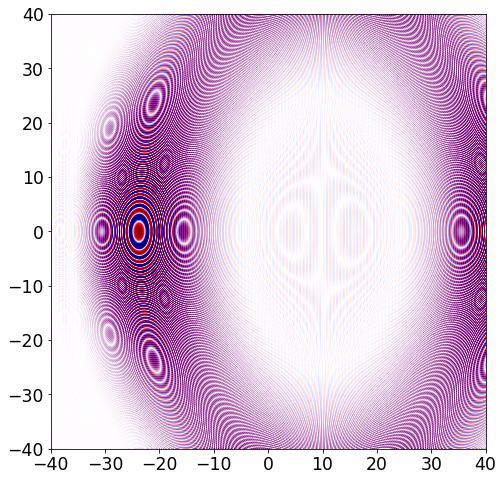

In [18]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.imshow(I2,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))

# Comput angles of lines

In [19]:
V,U=np.gradient(I1)

In [20]:
Norm=np.sqrt(U**2+V**2)
U=U/Norm
V=V/Norm

In [21]:
eps=1e-12
V=np.where(np.abs(V)<eps,eps,V)
U=np.where(np.abs(U)<eps,eps,U)
tanAngle=  V/U
Angle= 180/np.pi*np.arctan(V/U)

## Plot angles of spectra

Text(0.5, 1.0, 'tangent Angle')

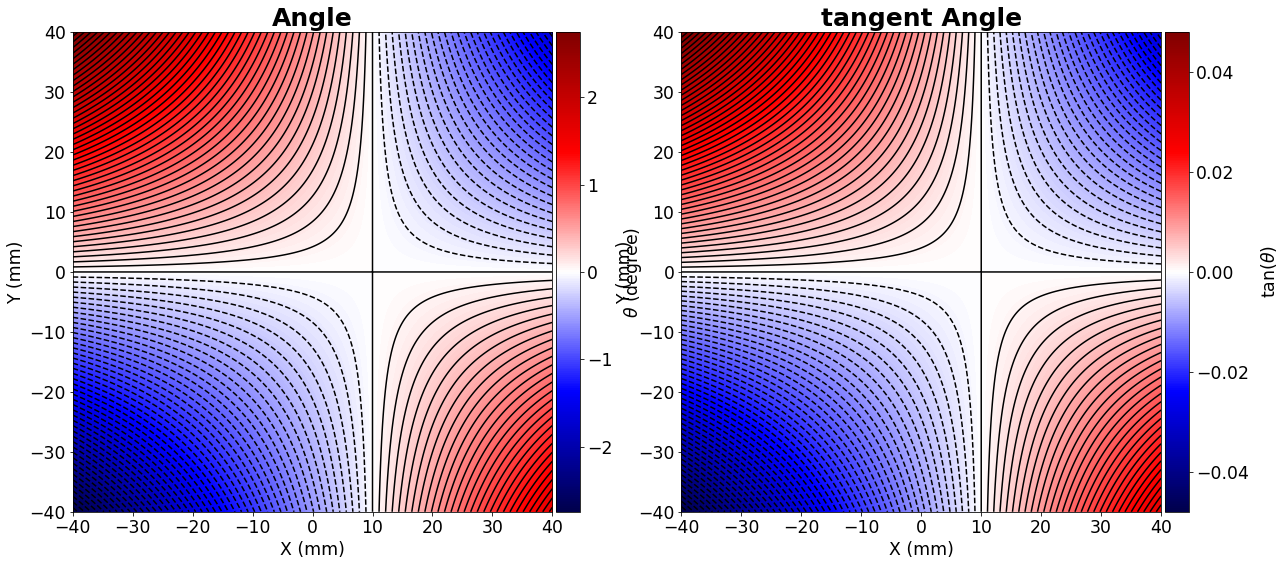

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Angle,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Angle,levels=100,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("Angle",fontweight="bold",fontsize=25)

ax2 = fig.add_subplot(122)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(tanAngle,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X,Y,tanAngle,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\tan(\\theta)$', rotation=90)

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("tangent Angle",fontweight="bold",fontsize=25)


# Analytical functions for angles

In [27]:
def z_angle(x,y):
    delta=x_B-x_A
    return 180./np.pi*np.arctan(delta*y*(delta-2*x)/8/delta/Z**2)

In [28]:
def z_angleall(x,y):
    
    dA=dd(x,y,x_A,y_A)
    dB=dd(x,y,x_B,y_B)
    
    DxDy=(dB*(y-y_A)-dA*(y-y_B))/(dB*(x-x_A)-dA*(x-x_B))
    return 180./np.pi*np.arctan(DxDy)

In [29]:
Z_Ang=z_angle(XX, YY)
Z_Angall=z_angleall(XX, YY)

## Plot angles

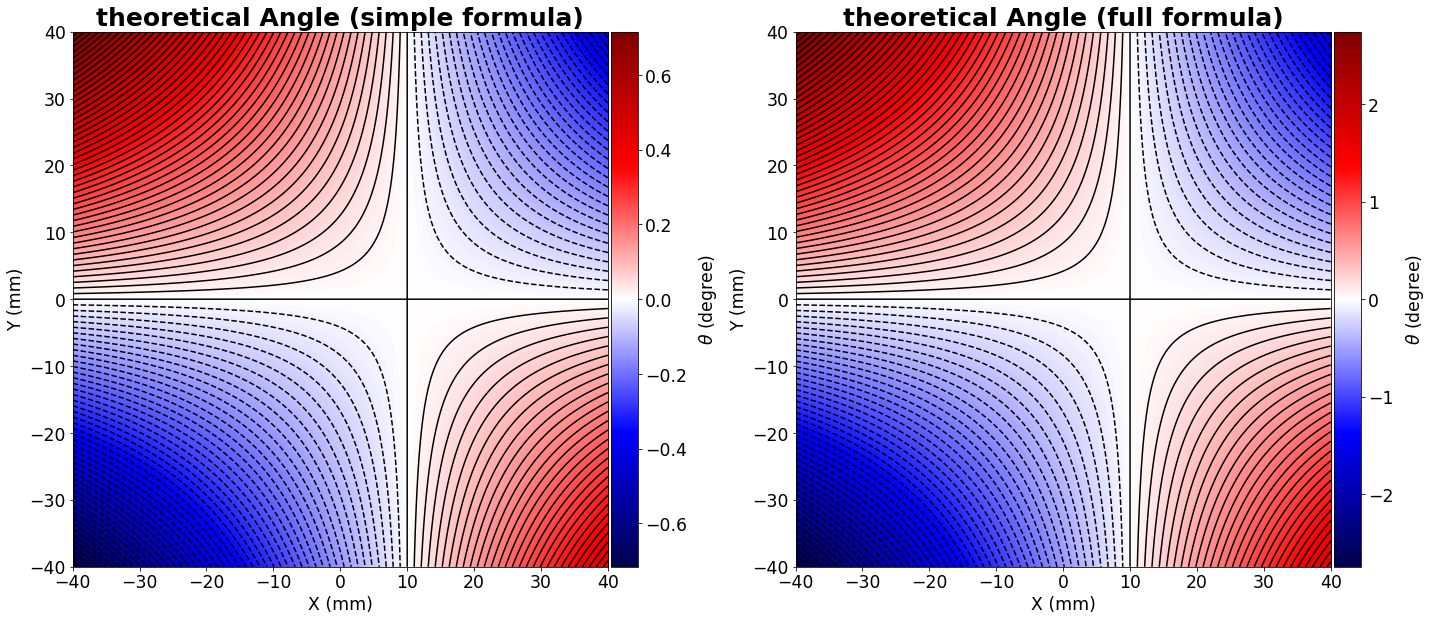

In [30]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Ang,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Ang,levels=100,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("theoretical Angle (simple formula)",fontweight="bold",fontsize=25)


ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(Z_Angall,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X,Y,Z_Angall,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("theoretical Angle (full formula)",fontweight="bold",fontsize=25)

plt.tight_layout()
plt.show()

# Neff

In [61]:
def Neff (x,y) :
    """
    """
    
    alpha = np.pi/180.*z_angleall(x,y)
    
    dd_A=dd(x,y,x_A,y_A)
    dd_B=dd(x,y,x_B,y_B)
    
    
    dd_A0=dd(0,0,x_A,y_A)
    dd_B0=dd(0,0,x_B,y_B)
    
    neff_max=(x_B-x_A)/wl0/np.sqrt(Z**2 + ((x_B-x_A)/2)**2)
    
    neff =((np.cos(alpha)*((x-x_A)/dd_A - (x-x_B)/dd_B)+ np.sin(alpha)*((y-y_A)/dd_A - (y-y_B)/dd_B)))*neff_max * dd_A0/(x_B-x_A)
    return neff
    

In [62]:
Z_neff=Neff(XX,YY)

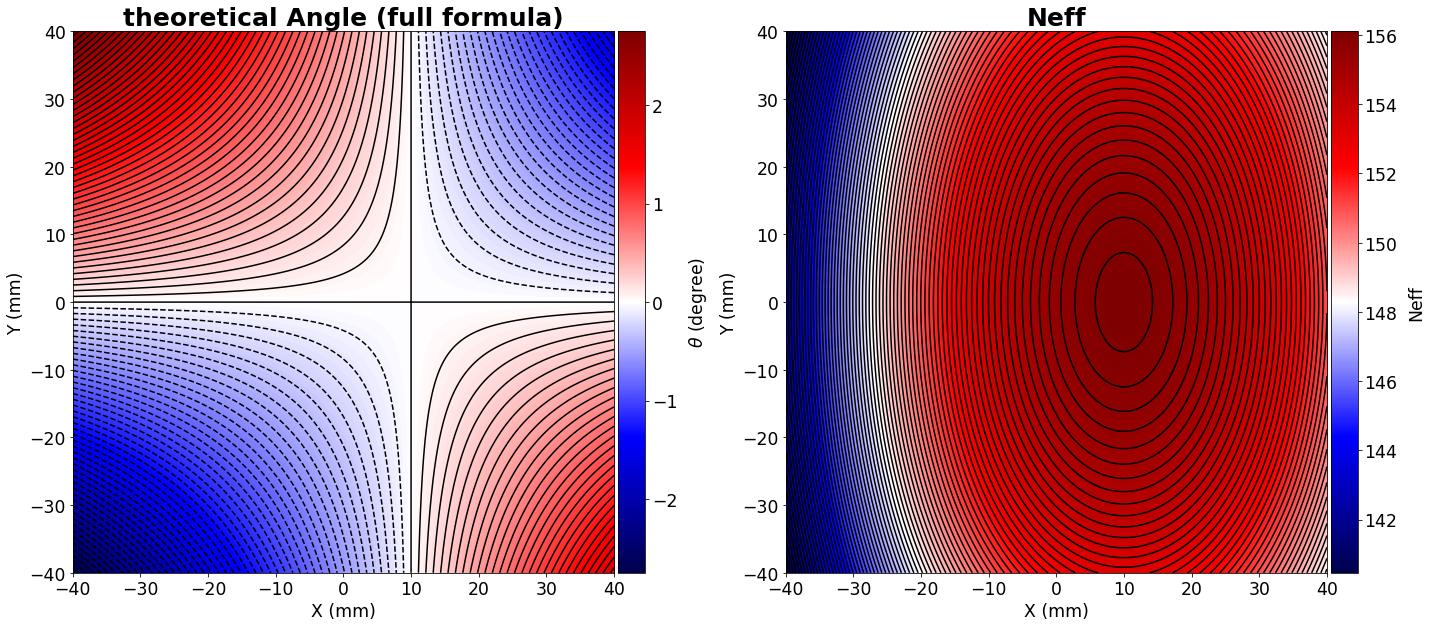

In [63]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Angall,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Angall,levels=100,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("theoretical Angle (full formula)",fontweight="bold",fontsize=25)


ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(Z_neff,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X,Y,Z_neff,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('Neff', rotation=90)

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("Neff",fontweight="bold",fontsize=25)



plt.tight_layout()
plt.show()

In [40]:
Z_neff2=Neff(XX,YY)*deriv_interf_pattern(XX,YY)

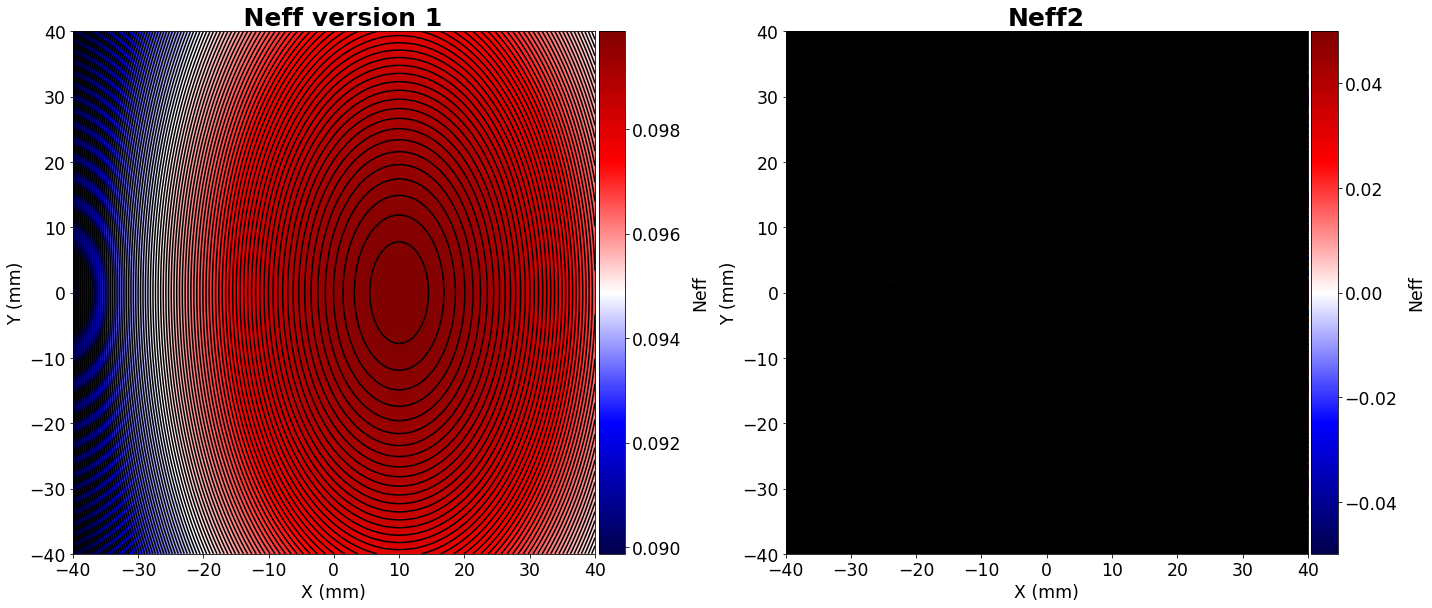

In [41]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_neff,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_neff,levels=100,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('Neff', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("  Neff version 1",fontweight="bold",fontsize=25)


ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(Z_neff2,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X,Y,Z_neff2,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('Neff2', rotation=90)

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("Neff2",fontweight="bold",fontsize=25)



plt.tight_layout()
plt.show()